## Loading Libraries & Dataset

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings("ignore")

ipl = pd.read_csv("IPL.csv")
ipl.head()


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


## Basic Information

### Check the size & column of the Dataset

In [221]:
print("No. of Rows:",ipl.shape[0])
print("No. of Columns:",ipl.shape[1])
print("-----------INFO------------")
ipl.info()

No. of Rows: 74
No. of Columns: 20
-----------INFO------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 

### Now lets see how many columns have null values in total

In [204]:
ipl.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## Now here comes some Basic Questions

#### 1.Which team  won the most matches?

In [228]:
xyz = ipl['match_winner'].value_counts()
print(xyz.index[0])
print(xyz.values[0])

Gujarat
12


Team: Gujarat
Wins: 12


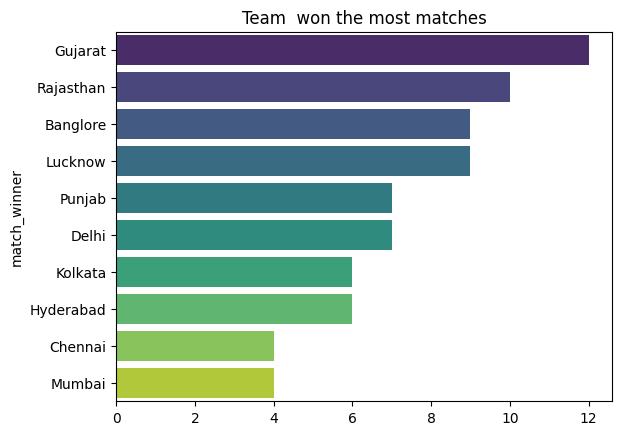

In [229]:
#plotting
match_wins = ipl['match_winner'].value_counts()
sb.barplot(y = match_wins.index,x = match_wins.values,palette='viridis')
plt.title("Team  won the most matches")

#printing Data
team_max_won =ipl['match_winner'].value_counts().idxmax()
no_of_wins =  ipl['match_winner'].value_counts().max()
print(f"Team: {team_max_won}\nWins: {no_of_wins}")




#### 2. Toss Decision Trends

Choosing Fielding percentage:  79.72972972972973
Choosing Batting percentage:  20.27027027027027


Text(0.5, 1.0, 'Toss Decision Trends ')

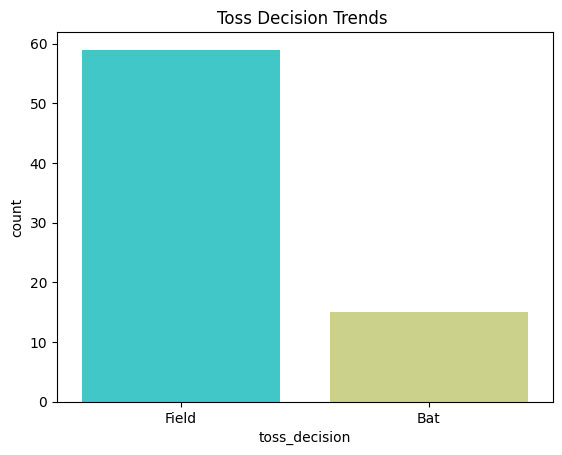

In [206]:
#printing Data
toss = ipl['toss_decision'].value_counts()
print("Choosing Fielding percentage: ",(toss.Field/(toss.Field + toss.Bat))*100)
print("Choosing Batting percentage: ",(toss.Bat/(toss.Field + toss.Bat))*100)

#plotting
sb.countplot(x = ipl['toss_decision'],palette='rainbow')
plt.title("Toss Decision Trends ")

#### 3. Toss winner vs Match winner

In [207]:
toss_vs_match = ipl[ipl['toss_winner'] == ipl['match_winner']].shape[0]
toss_vs_match2 = ipl[ipl['toss_winner'] != ipl['match_winner']].shape[0]
print(f"There are '{toss_vs_match}' Matches Where Teams who won the Toss and the match")
print(f"There are '{toss_vs_match2}' Matches Where Teams who won the Toss but lost the match")






There are '36' Matches Where Teams who won the Toss and the match
There are '38' Matches Where Teams who won the Toss but lost the match


#### 4. How do team win? (Runs vs Wickets)

Number of teams won by Runs: 37
Number of teams won by Wickets: 37


Text(0.5, 1.0, 'Won by')

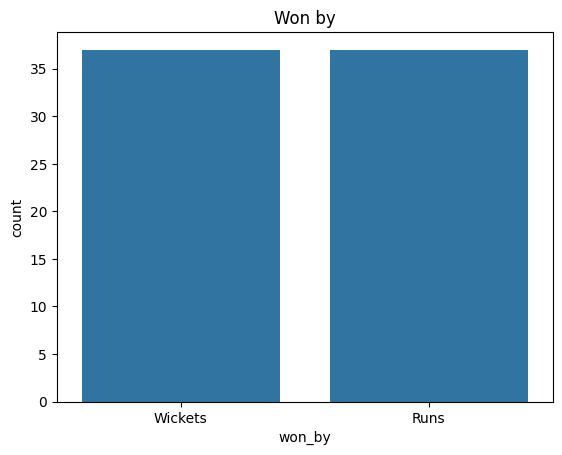

In [208]:
won_by_runs = ipl[ipl['won_by'] == "Runs"].shape[0]
print(f"Number of teams won by Runs: {won_by_runs}")

won_by_wickets = ipl[ipl['won_by'] == "Wickets"].shape[0]
print(f"Number of teams won by Wickets: {won_by_wickets}")

#plotting 
sb.countplot(x = ipl['won_by'])
plt.title("Won by")

## Key Player Performance

#### 1. Most POTM Awards

Text(0.5, 1.0, 'Top 5 Most MOTM Players')

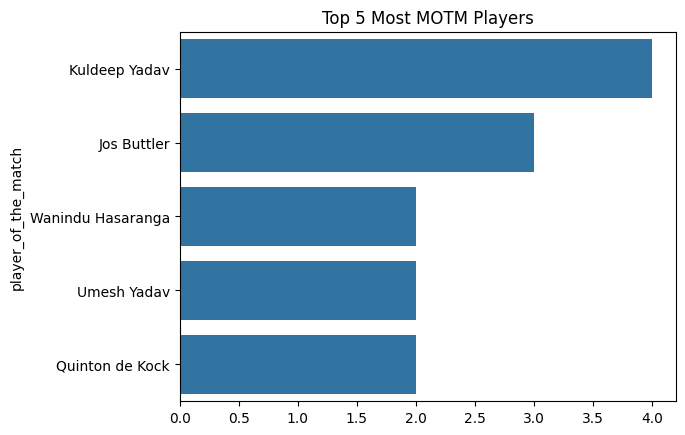

In [237]:

most_POTM = ipl['player_of_the_match'].value_counts().head()
sb.barplot(x = most_POTM.values , y = most_POTM.index)
plt.title("Top 5 Most MOTM Players")

#### 2. Two Top Scorers

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64


Text(0.5, 1.0, 'Top Two Scorers')

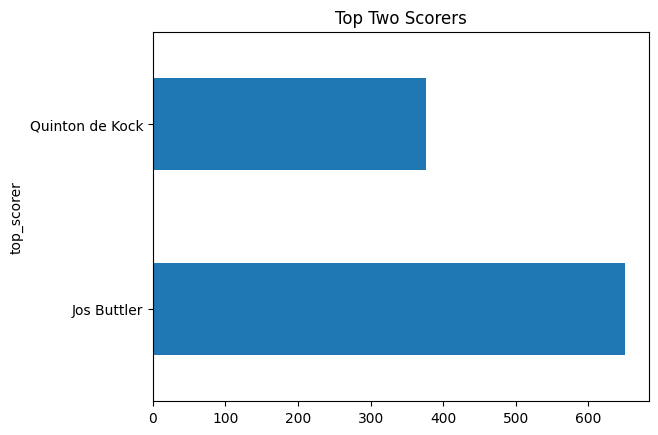

In [231]:
ipl.head()
top_scorers = ipl.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
print(top_scorers)

#plotting
top_scorers.plot(kind='barh')
plt.title("Top Two Scorers")

#### 3. Ten Best Bowling Figures

Text(0.5, 1.0, 'Top Ten Bowling Figures')

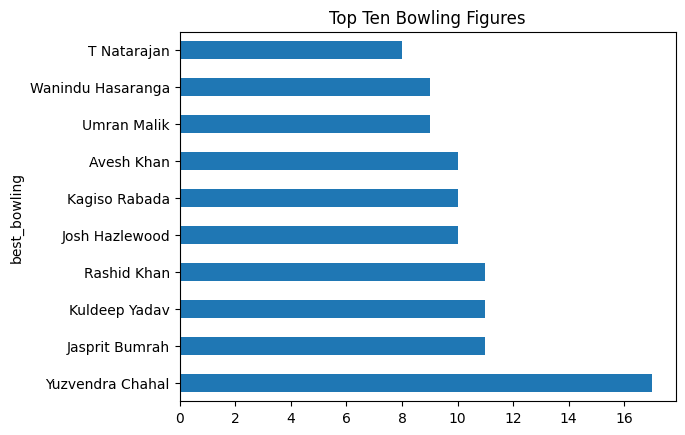

In [ ]:
ipl.head()
ipl["highest_wickets"] = ipl['best_bowling_figure'].apply(lambda x:x.split('--')[0])
ipl["highest_wickets"] = ipl['highest_wickets'].astype(int)
top_bowlers = ipl.groupby("best_bowling")['highest_wickets'].sum().sort_values(ascending=False).head(10)

#plotting
top_bowlers.plot(kind='barh')
plt.title("Top Ten Bowling Figures")

## Venue Analysis

#### 1. Most matches played by Venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64


Text(0.5, 1.0, 'Most matches played by Venue')

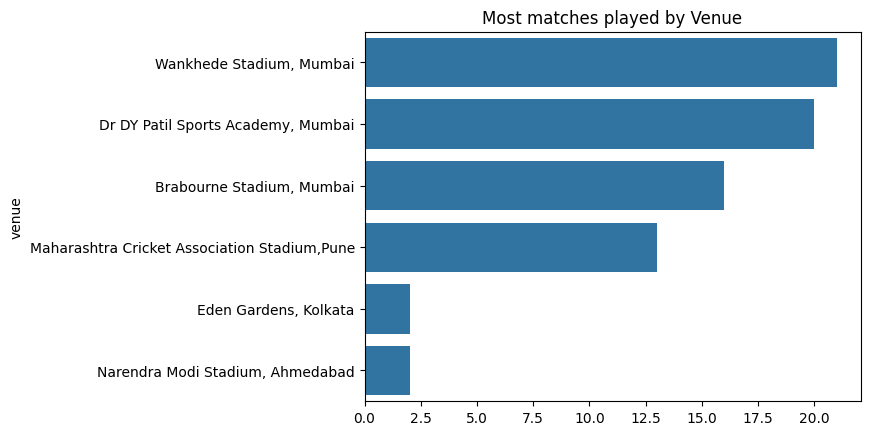

In [233]:
venue_count = ipl['venue'].value_counts()
print(venue_count)
sb.barplot(x = venue_count.values, y = venue_count.index)
plt.title("Most matches played by Venue")

## Custom Questions & Insights

#### Q1. Who won the highest margin by runs?

In [213]:
highest_margin_win = ipl[ipl['won_by']== 'Runs'].sort_values(by='margin',ascending=False).head(1)
highest_margin_win[['match_winner','margin']]
# print("Team with the highest margin win by runs")
# print(f"Team: {highest_margin_win['match_winner'].iloc[0]} \nMargin: {highest_margin_win['margin'].iloc[0]}")


,match_winner,margin
54,Chennai,91


#### Q2. Which player had the highest individual score?

In [214]:
ipl[ipl['highscore'] == ipl['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


#### Q3. Which bowler had the best bowling figures?

In [215]:
ipl["Runs_conceded"] = ipl['best_bowling_figure'].apply(lambda x:x.split('--')[1])

ipl["Runs_conceded"] = ipl['Runs_conceded'].astype(int)


best_bowler = ipl.sort_values(by=['highest_wickets', 'Runs_conceded'], ascending=[False, True]).iloc[0]
print(f"Best bowler: {best_bowler['best_bowling']}  Figure: {best_bowler["best_bowling_figure"]}")

Best bowler: Jasprit Bumrah  Figure: 5--10


In [216]:
# top 3 best bowling figues:
best_bowler = ipl.sort_values(by=['highest_wickets', 'Runs_conceded'], ascending=[False, True]).head(3)
best_bowler[['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
55,Jasprit Bumrah,5--10
53,Wanindu Hasaranga,5--18
39,Umran Malik,5--25
